In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

%matplotlib inline

In [23]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sale=pd.read_csv(r'C:\Users\ELCOT\Documents\Machine learning\Datasets\sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [25]:
sale.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


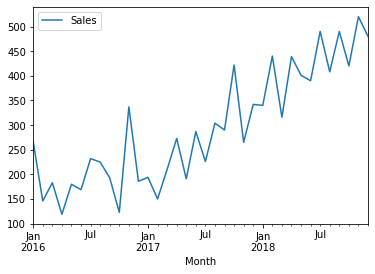

In [27]:
sale.plot()

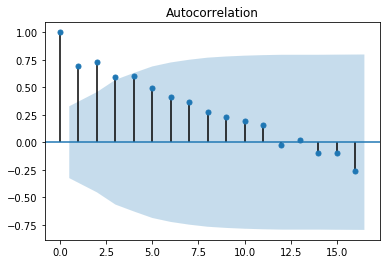

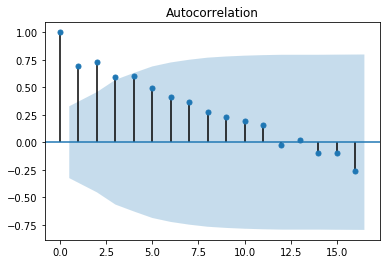

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sale)

In [31]:
sale.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [32]:
sale.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [33]:
sales_diff = sale.diff(periods=1)

In [38]:
sales_diff=sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


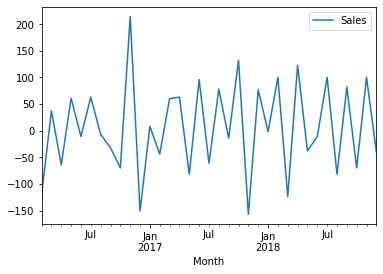

In [42]:
sales_diff.plot()

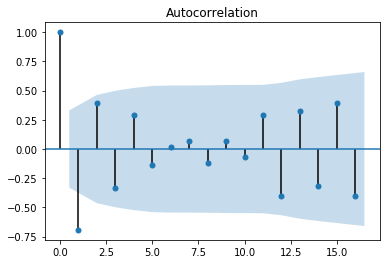

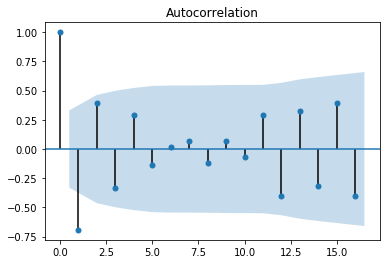

In [41]:
plot_acf(sales_diff)

In [64]:
x=sale.values
train=x[0:27]
test=x[26:]
prediction=[]

In [52]:
train.size

27

In [53]:
test.size

9

In [54]:
x.size

36

# Autoreggresive AR Model

In [55]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [65]:
predictions = model_ar_fit.predict(start=26,end=36)

In [66]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

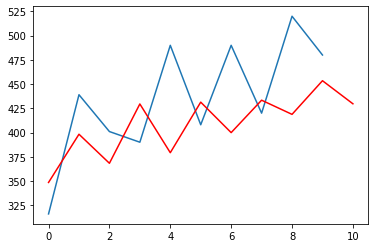

In [67]:
plt.plot(test)
plt.plot(predictions,color='red')

# ARIMA MODEL

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.1619843151009


In [70]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.05168394, 355.93450127, 413.10214605, 374.50427007,
       446.94894908, 378.61144858, 406.38148594, 411.37869594,
       475.89690628, 415.38242744])

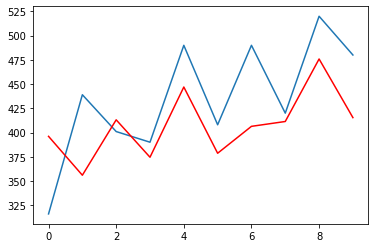

In [71]:
plt.plot(test)
plt.plot(predictions,color='red')

In [72]:
mean_squared_error(test,predictions)

2959.8705042459906

In [73]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [74]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809385551
(0, 0, 2) 315.25060028721873
(0, 0, 3) nan
(0, 0, 4) 310.1669328576495
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841541066672
(0, 1, 2) 296.3229226907691
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019462764249
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174410298
(1, 0, 2) 310.9790642261458
(1, 1, 0) 298.8325442271941
(1, 1, 1) 297.12565112585656
(1, 1, 2) 299.47166670626615
(1, 1, 3) 301.2851180948551
(1, 1, 4) 299.97873239715943
(1, 2, 0) 306.53077675711666
(2, 0, 0) 310.99695736299554
(2, 0, 1) 340.2223503288016
(2, 1, 0) 300.20895612401296
(2, 1, 1) 297.9999930167372
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.8720829276623
(2, 2, 0) 306.29758564320736
(3, 0, 0) 312.98385874219616
(3, 0, 1) 335.18669986231066
(3, 1, 0) 294.8543584218627
(3, 1, 1) 295.99793534184545
(3, 1, 2) 292.6686238693898
(3, 1, 3) 294.6588907517381
(3, 2, 0) 299.40758681553757
(4, 0, 0) 318.99281327749134
(4, 0, 1) 321.9657027137871
(4, 1, 0) 295.93436